In [6]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nelgiriyewithana_apple_quality_path = kagglehub.dataset_download('nelgiriyewithana/apple-quality')

print('Data source import complete.')


Data source import complete.


Ex 3: Transparency in AI Decision-Making

Objective: To compare transparent vs. black-box models.


To compare a transparent model (Decision Tree) and a black-box model (Random Forest) and understand how transparency in AI decision-making affects trust, interpretability, and ethical implications.

In [20]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
# Load the apple-quality dataset
data = pd.read_csv("/kaggle/input/apple-quality/apple_quality.csv")

# Convert 'Acidity' column to numeric, coercing errors to NaN
data['Acidity'] = pd.to_numeric(data['Acidity'], errors='coerce')

# Drop rows with NaN values that were introduced by the coercion
data.dropna(inplace=True)

In [9]:
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [10]:
data.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [11]:
X = data.drop('Quality', axis=1)
y = data['Quality']

In [12]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Train Decision Tree
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

DecisionTreeClassifier(max_depth=4): Limits tree depth to 4 (for readability).

.fit(): Trains the tree on training data.

.predict(): Uses the trained model to predict outcomes for test data.

In [14]:
# Train Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

RandomForestClassifier(n_estimators=100): Uses 100 trees in the forest.

More trees → better accuracy, but harder to interpret.

.fit() and .predict() as above.

In [15]:
# Evaluate both models
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_forest = accuracy_score(y_test, y_pred_forest)

In [16]:
print("Decision Tree Accuracy:", acc_tree)
print("Random Forest Accuracy:", acc_forest)

Decision Tree Accuracy: 0.7308333333333333
Random Forest Accuracy: 0.8966666666666666


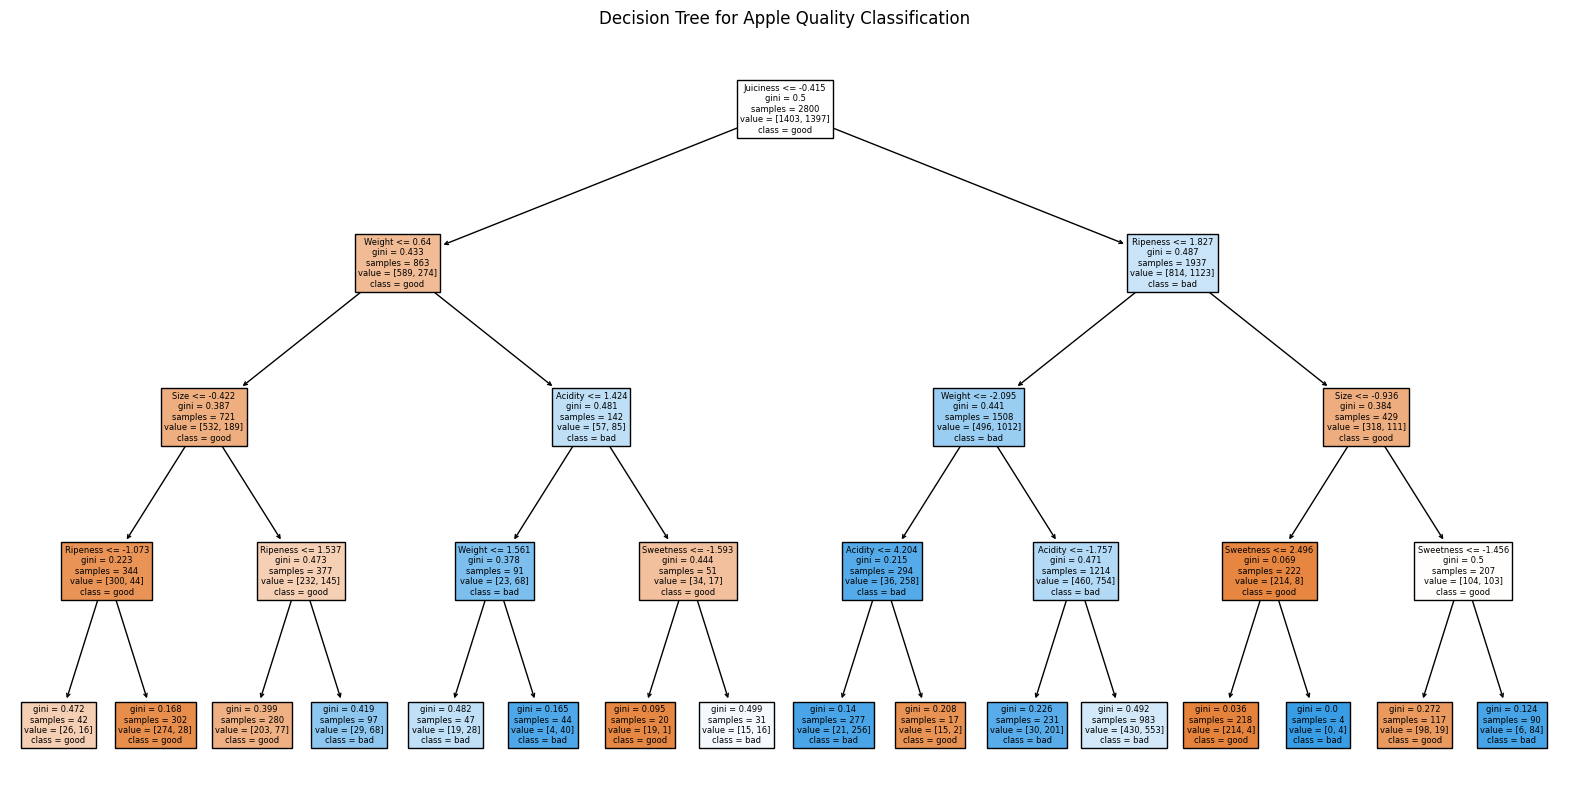

In [17]:
# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.title("Decision Tree for Apple Quality Classification")
plt.show()

In [18]:
# Classification report (optional for deeper analysis)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Classification Report:
              precision    recall  f1-score   support

         bad       0.82      0.58      0.68       593
        good       0.68      0.88      0.77       607

    accuracy                           0.73      1200
   macro avg       0.75      0.73      0.72      1200
weighted avg       0.75      0.73      0.72      1200



In [19]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))

Random Forest Classification Report:
              precision    recall  f1-score   support

         bad       0.90      0.89      0.89       593
        good       0.89      0.90      0.90       607

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200



The Random Forest model achieved a higher accuracy (around 89.7%) compared to the Decision Tree model (around 73.1%). This indicates that the Random Forest, as a black-box model, performed better in classifying apple quality on this dataset.

The Decision Tree, despite its lower accuracy, offers transparency. The generated tree visualization shows the explicit rules and features used to make predictions, making it easy to understand why a particular apple is classified as 'good' or 'bad'. This transparency is valuable for building trust and interpreting the model's behavior.

The Random Forest, while more accurate, is less transparent. It is an ensemble of many trees, and understanding the collective decision-making process of all these trees is much more challenging than interpreting a single decision tree. This lack of transparency can be a drawback in scenarios where understanding the "why" behind a prediction is crucial, such as in regulated industries or when ethical implications are significant.

In conclusion, this experiment demonstrates the trade-off between model accuracy and transparency. While a black-box model like Random Forest might offer superior performance, a transparent model like a Decision Tree provides valuable insights into the decision-making process, which can be essential for interpretability, trust, and addressing ethical considerations in AI. The choice between these models depends on the specific priorities of the application: prioritize accuracy for optimal performance, or transparency for understanding and trust.